In [1]:
import sys
import os
import numpy as np
from typing import List
import matplotlib.pyplot as plt

import parse
import features
import plot


In [2]:
# Specify path to raw data file.
RAW_DATA_FILE = os.path.join(os.environ["HOME"], "data", "accelerometer", "WISDM_ar_v1.1", "WISDM_ar_v1.1_raw.txt")

# Plotting options
SHOW_PLOTS = True


In [3]:
# Read and parse data from file.
raw_data = parse.file_to_string(RAW_DATA_FILE)
raw_measurements = parse.timepoint_strings_to_timepoint_tuples(
    parse.raw_data_string_to_timepoint_strings(raw_data)
)
user_ids = parse.extract_user_set(raw_measurements)
activities = parse.extract_activity_set(raw_measurements)
print(activities)
print(user_ids)

{'Jogging', 'Downstairs', 'Sitting', 'Standing', 'Walking', 'Upstairs'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}


In [4]:
raw_times = np.array([x[2] for x in raw_measurements])
raw_time_differences = raw_times[1:] - raw_times[:-1]

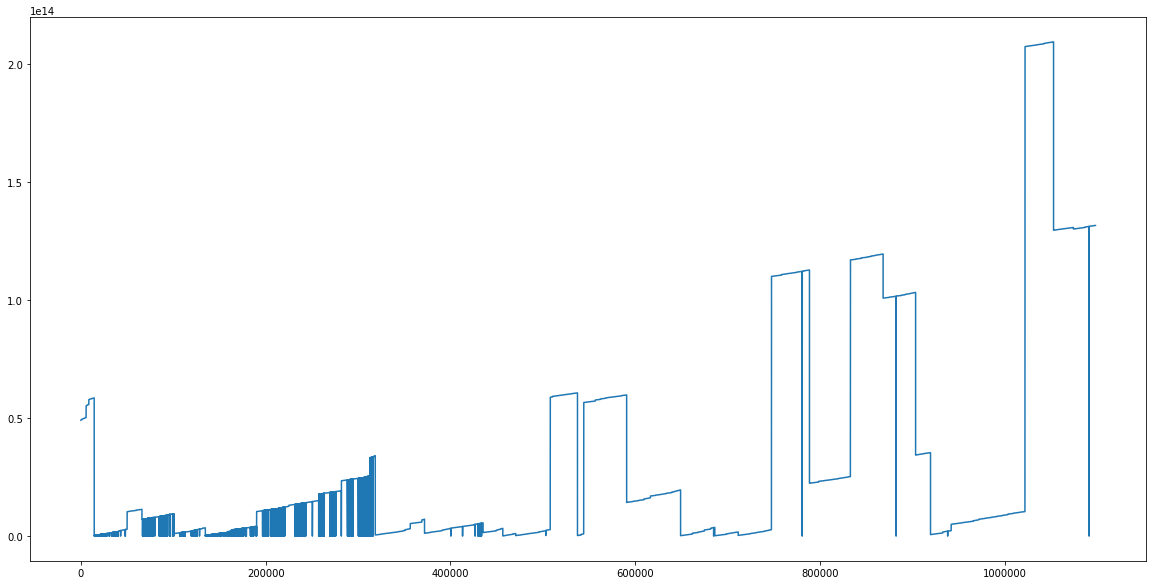

In [5]:
# Plot measurement times (in nanoseconds) for whole data set.
if SHOW_PLOTS: figure, axis = plot.overlay_series(np.arange(0, len(raw_times)), [raw_times])

In [6]:
raw_accelerations = []
for column in [3, 4, 5]:
    raw_accelerations.append(np.array([v[column] for v in raw_measurements]))

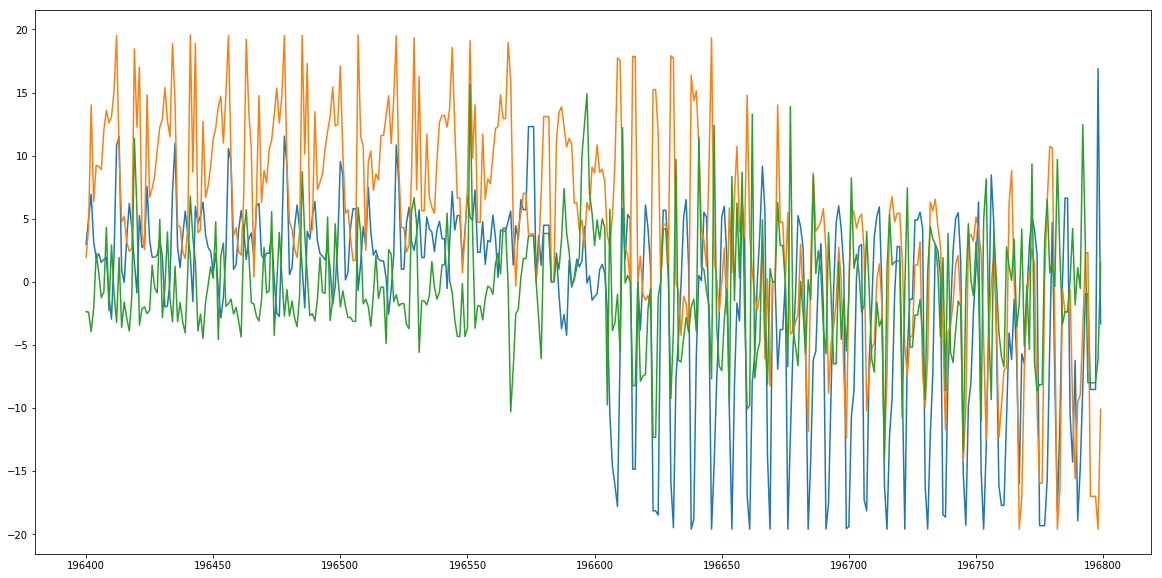

In [7]:
# Plot segment of raw acceleration data against row number.
if SHOW_PLOTS:
    start =  196400
    finish = 196800
    figure, axis = plot.overlay_series(np.arange(0, len(raw_times))[start: finish],
                                       [x[start: finish] for x in raw_accelerations])

In [8]:
# Parse raw data into 10 second intervals.
nanoseconds_in_one_second = 1000000000
nanoseconds_in_10_seconds = 10000000000
intervals: dict = parse.intervals_by_user_and_activity(
    raw_measurements,
    interval_duration_in_nanoseconds=nanoseconds_in_10_seconds,
    maximum_gap_in_nanoseconds=(nanoseconds_in_one_second * 2)
)

In [9]:
# Count number of intervals for each user and activity
all_counts = parse.count_intervals(intervals)
activity_counts = parse.count_intervals_per_activity(intervals)
user_counts = parse.count_intervals_per_user(intervals)
print(activity_counts)
print(user_counts)


{'Jogging': 1719, 'Downstairs': 468, 'Sitting': 292, 'Standing': 233, 'Walking': 2119, 'Upstairs': 592}
{1: 145, 2: 116, 3: 171, 4: 54, 5: 138, 6: 144, 7: 146, 8: 202, 9: 64, 10: 168, 11: 153, 12: 157, 13: 181, 14: 188, 15: 134, 16: 101, 17: 139, 18: 161, 19: 221, 20: 279, 21: 172, 22: 109, 23: 126, 24: 125, 25: 66, 26: 158, 27: 170, 28: 104, 29: 187, 30: 122, 31: 217, 32: 174, 33: 189, 34: 174, 35: 110, 36: 158}


In [10]:
# Select random examples of each activity.

sampled_users = 33
samples_per_user = 1

np.random.seed(42)
examples = dict()
random_users = np.random.choice(list(user_ids), sampled_users)
for activity in activities:
    for user in random_users:
        if len(intervals[(user, activity)]) >= samples_per_user:
            examples[(user, activity)] = np.random.choice(intervals[(user, activity)], samples_per_user)


Upstairs
Downstairs


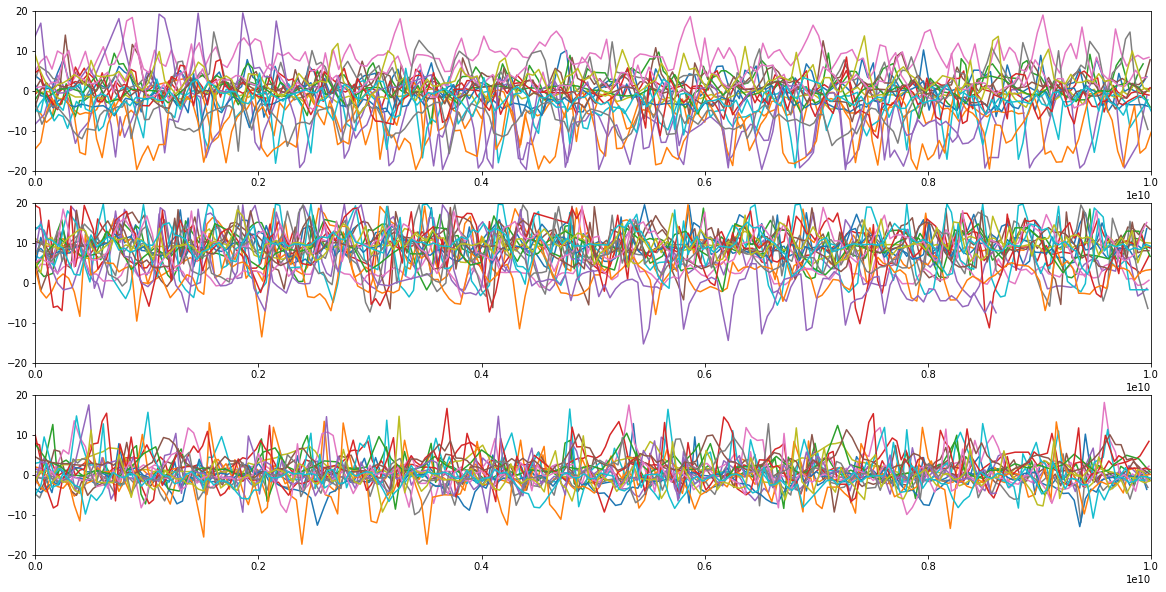

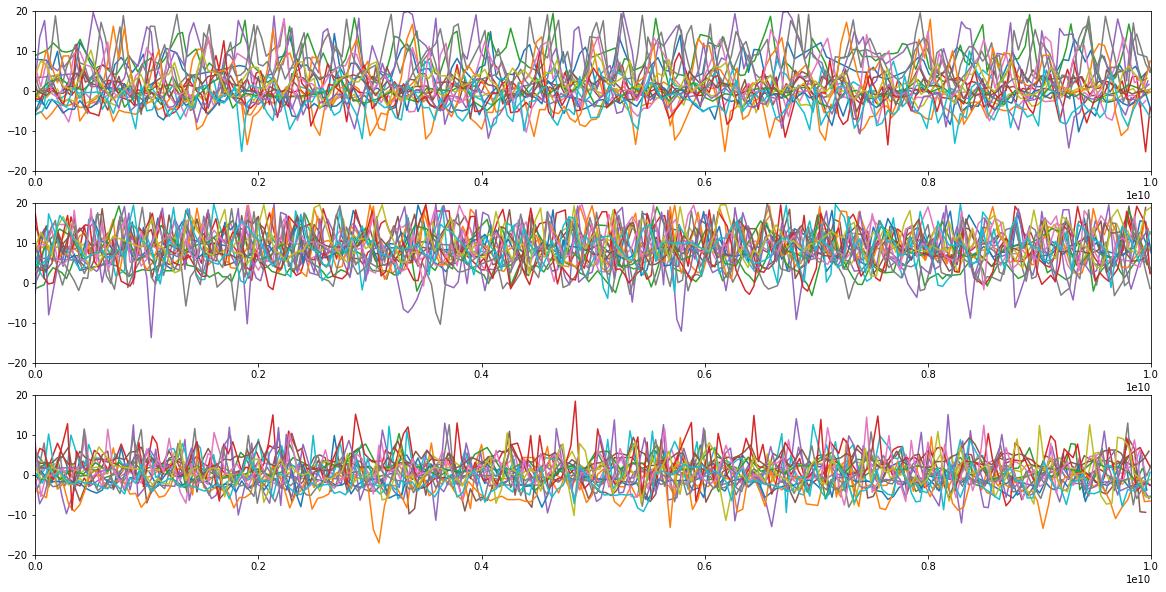

In [11]:
if SHOW_PLOTS: plot.intervals_by_activity(examples, ["Upstairs", "Downstairs"])

Walking
Jogging


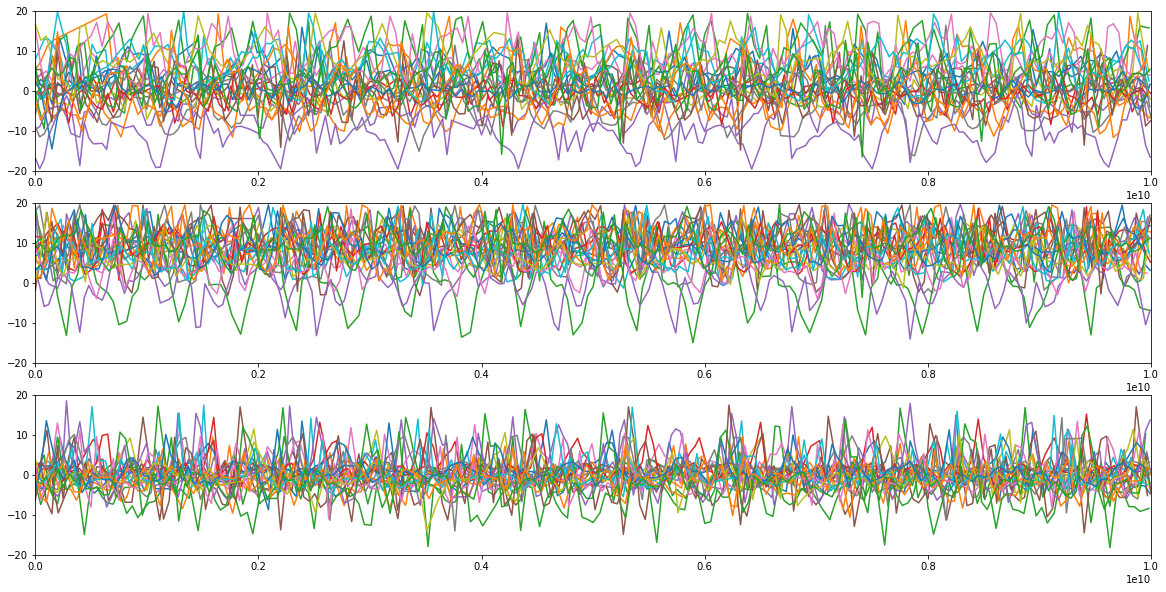

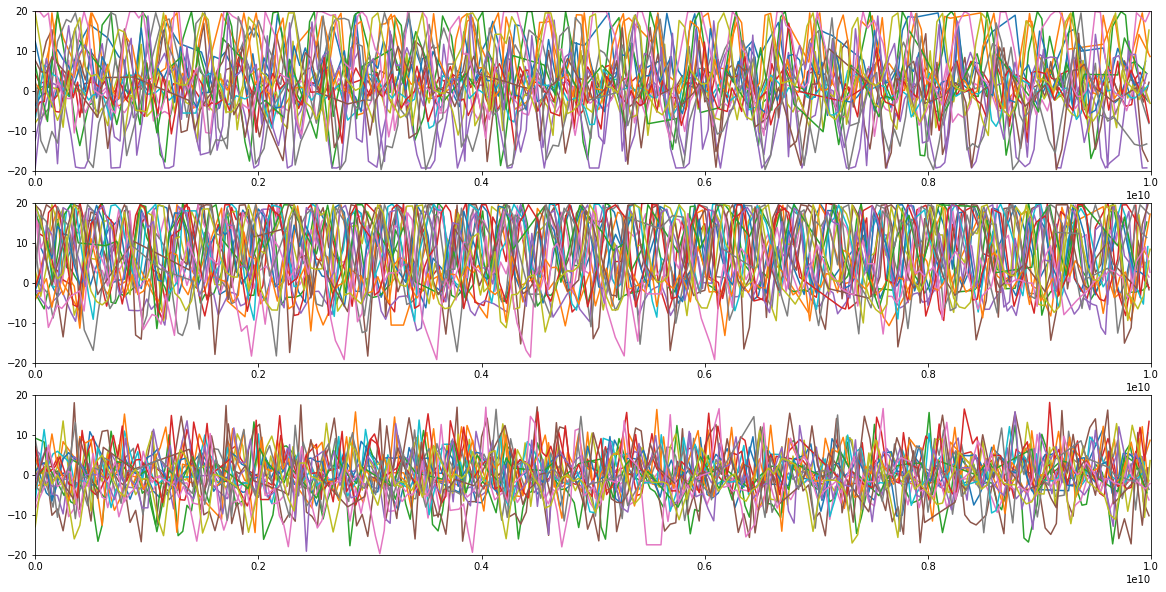

In [12]:
if SHOW_PLOTS: plot.intervals_by_activity(examples, ["Walking", "Jogging"])

Sitting
Standing


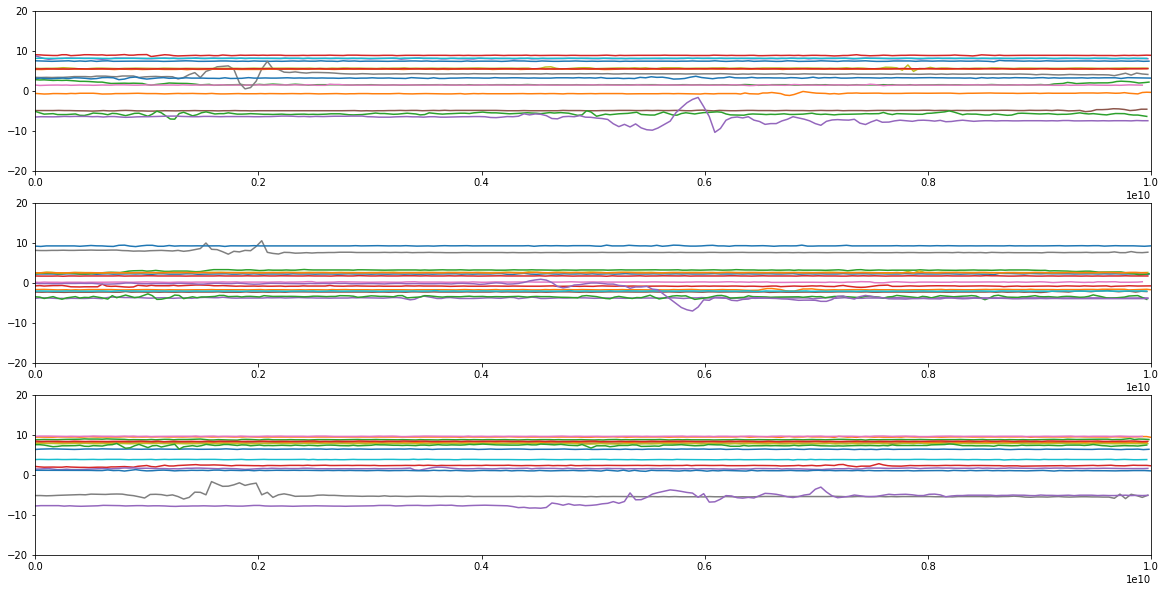

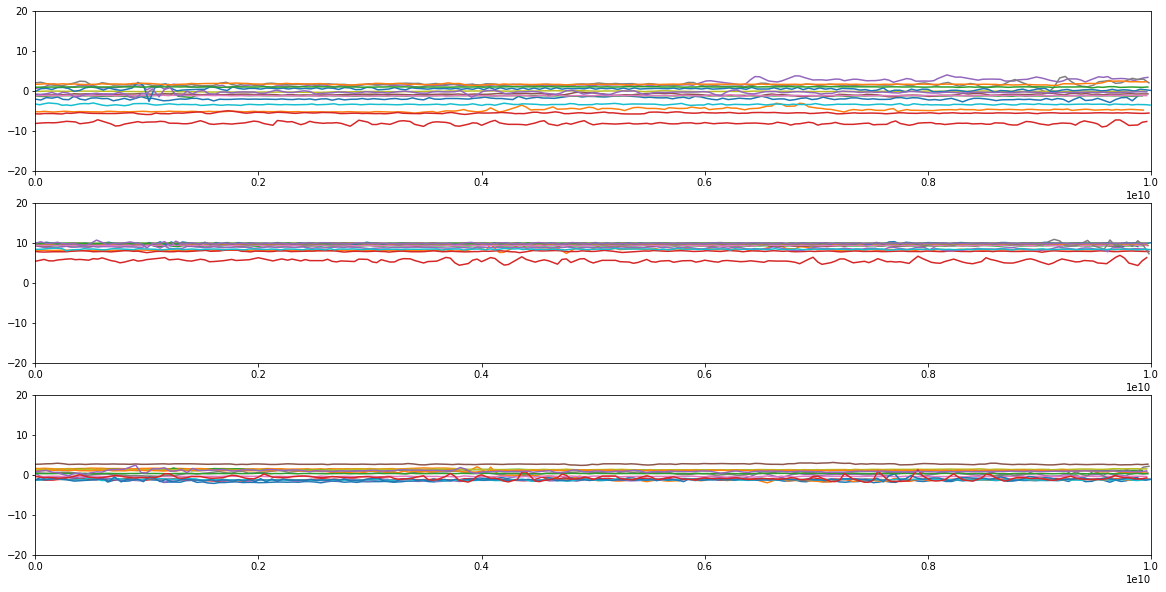

In [13]:
if SHOW_PLOTS: plot.intervals_by_activity(examples, ["Sitting", "Standing"])

In [14]:
# Calculate features for all data intervals
interval_features = features.vectors_for_intervals(
    intervals,
    (features.mean_absolute_magnitude_change_per_second, features.mean_angle_change_per_second)
)


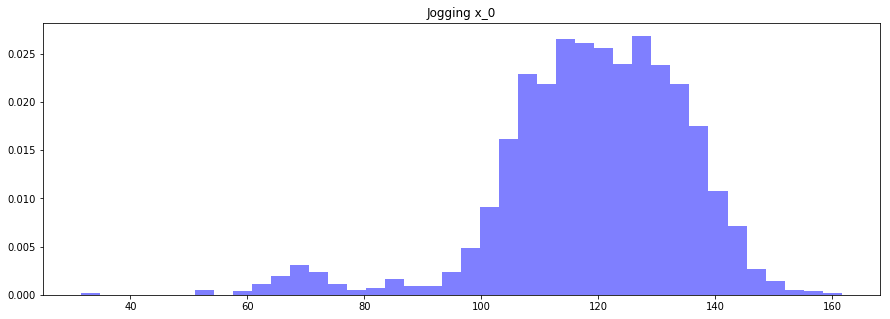

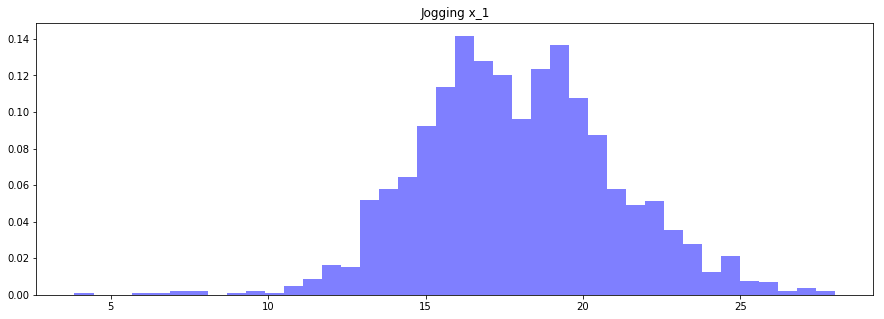

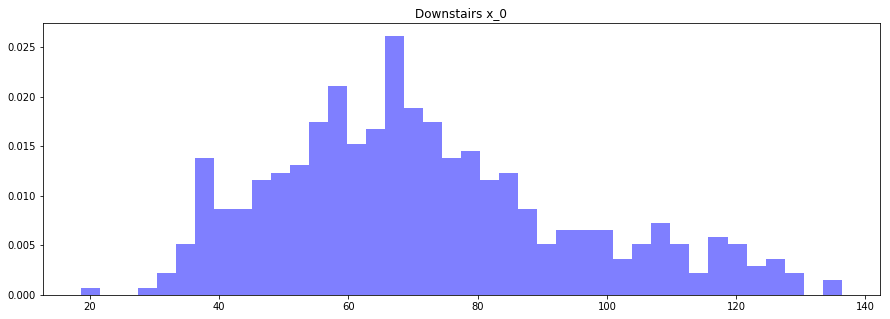

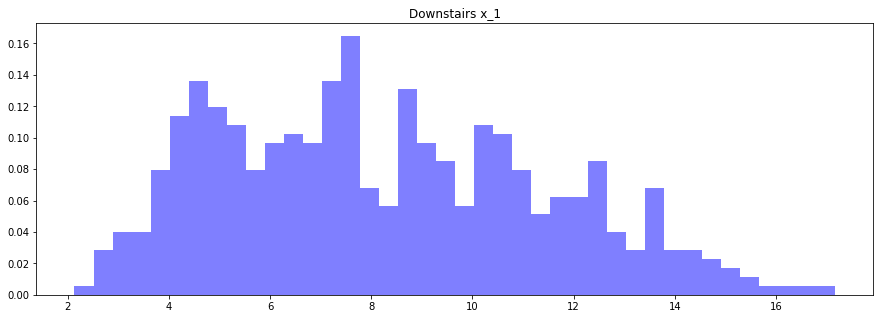

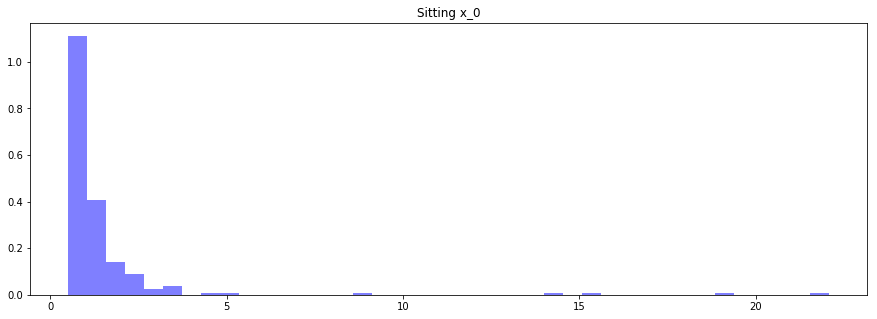

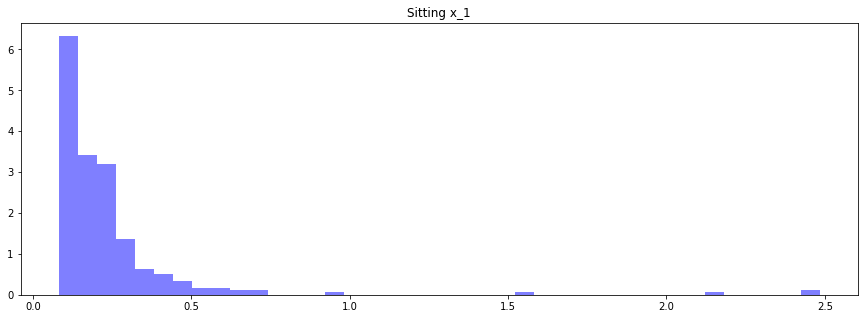

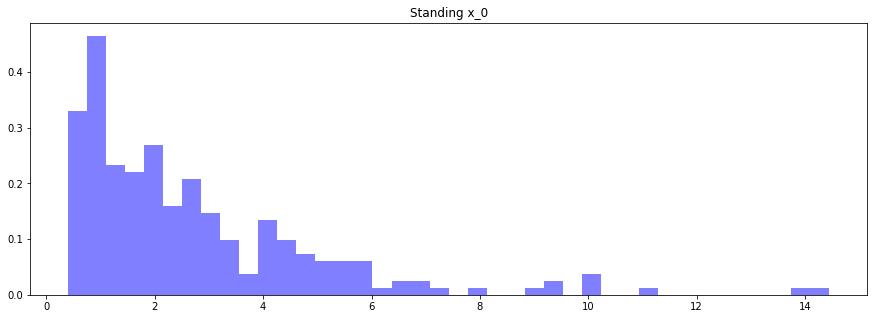

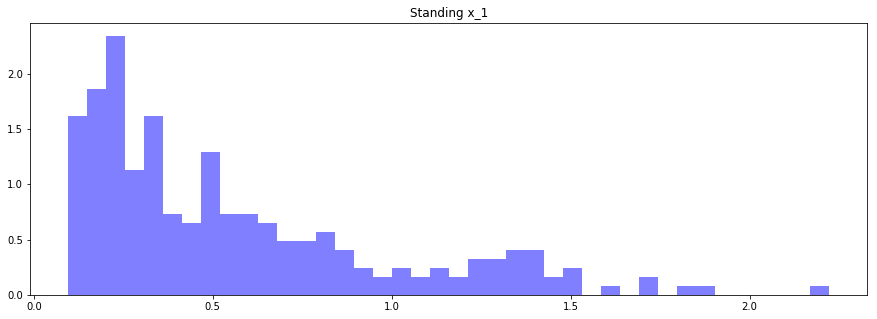

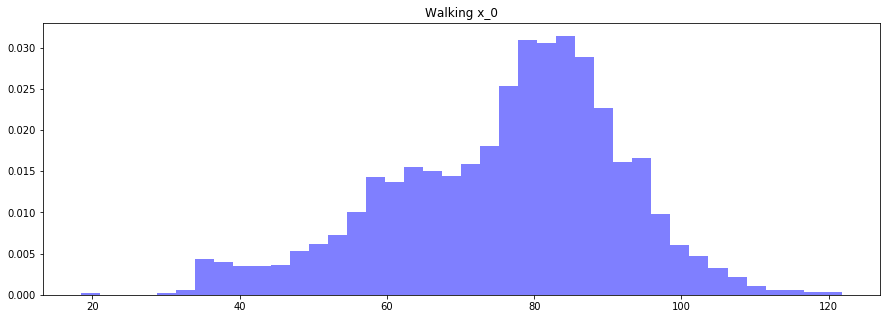

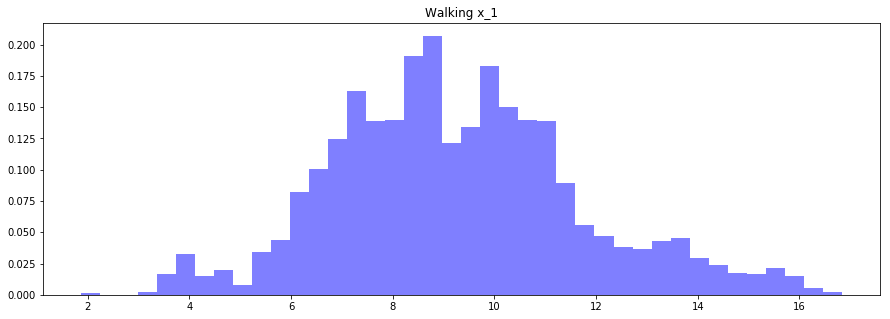

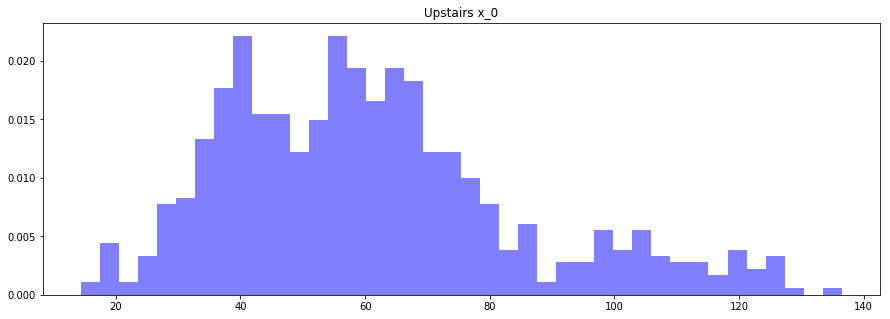

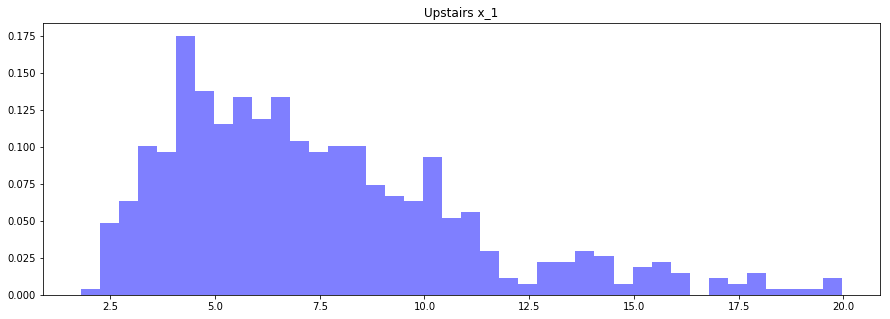

In [15]:
if SHOW_PLOTS: plot.feature_histograms_for_activities(interval_features, activities, 40)

In [16]:
sorted(list(activities))

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

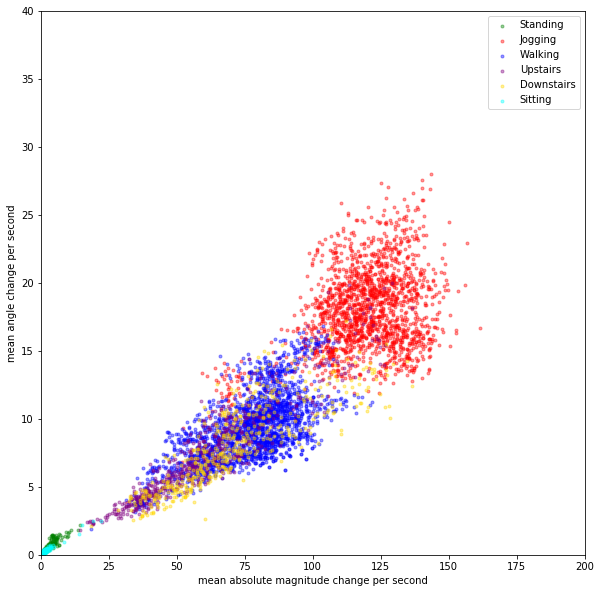

In [17]:
if SHOW_PLOTS:
    plot.feature_scatter_for_activities(
        interval_features,
        ['Standing', 'Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting'],
        ['green', 'red', 'blue', 'purple', 'gold', 'cyan']
    )